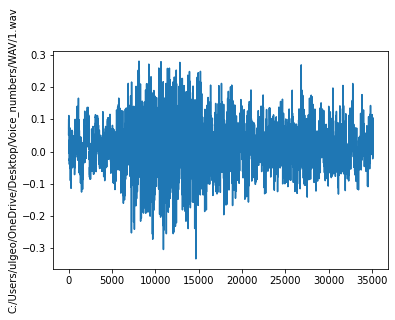

In [53]:
import soundfile as sf
import matplotlib.pyplot as plt

names = '1'
soundfile = names+'.wav'
soundfile_path = 'C:/Users/ulgeo/OneDrive/Desktop/Voice_numbers/WAV/'+soundfile

m68code = "/*    File "+soundfile+ "\r\n *    Sample rate "+str(int(desired_sample_rate)) +" Hz\r\n */\r\n"

if(names == 'Start_of_transmission'):
    m68code += "#define WAV_DATA_LENGTH_S "+str(len(data_out))+" \r\n"
elif(names == 'End_of_transmission'):
    m68code += "#define WAV_DATA_LENGTH_E "+str(len(data_out))+" \r\n"
else:
    m68code += "#define WAV_DATA_LENGTH_"+names+" "+str(len(data_out))+" \r\n"
    
m68code += "uint8_t WAV_DATA_" +names+ "[] = {\r\n    "

data_in, datasamplerate = sf.read(soundfile_path)
# This means stereo so extract one channel 0
if len(data_in.shape)>1:
    data_in = data_in[:,0]
plt.plot(data_in)
plt.ylabel(soundfile_path)
plt.show()



In [54]:
import samplerate
converter = 'sinc_best'  # or 'sinc_fastest', ...
desired_sample_rate = 44000.0
ratio = desired_sample_rate/datasamplerate
data_out = samplerate.resample(data_in, ratio, converter)
print(data_out)
maxValue = max(data_out)
minValue = min(data_out)
print("length", len(data_out))
print("max value", max(data_out))
print("min value", min(data_out))
vrange = (maxValue - minValue) 
print("value range", vrange)

[0.05201727 0.06828099 0.05767218 ... 0.0362799  0.04116729 0.00075989]
length 35009
max value 0.2804162
min value -0.33279407
value range 0.61321026


In [56]:
f_name = 'sounddata.h'


maxitemsperline = 64
itemsonline = maxitemsperline
firstvalue = 0
lastvalue = 0
for v in data_out:
    # scale v to between 0 and 1
    isin = (v-minValue)/vrange   
    v =  int((isin * 255))
    vstr = str(v)
    if (firstvalue==0):
        firstvalue= v
    lastvalue = v
    m68code+=vstr
    itemsonline-=1
    if (itemsonline>0):
        m68code+=','
    else:
        itemsonline = maxitemsperline
        m68code+=',\n    '
        
# keep track of first and last values to avoid
# blip when the loop restarts.. make the end value
# the average of the first and last. 
end_value = int( (firstvalue + lastvalue) / 2)
m68code+=str(end_value)+'    \r\n};'
f = open(f_name, 'w')
f.write(m68code)
f.close()
#print(m68code)
f = open(f_name, 'w')
f.close()